In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_data = pd.read_csv('heart.csv')

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


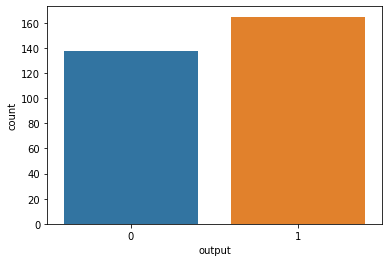

In [6]:
sns.countplot(x='output', data=heart_data)

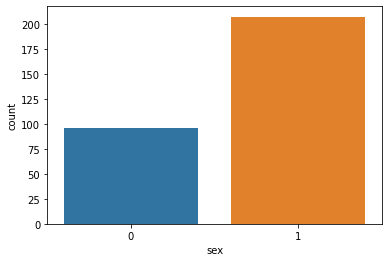

In [7]:
sns.countplot(x='sex', data=heart_data)

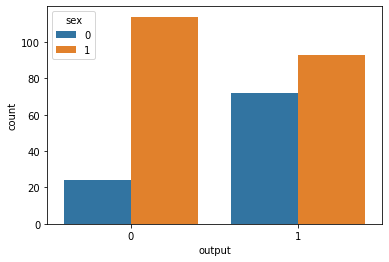

In [8]:
sns.countplot(x='output', data=heart_data, hue='sex')

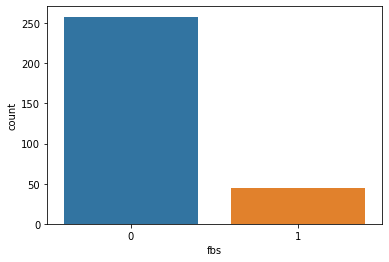

In [9]:
sns.countplot(x='fbs', data=heart_data)

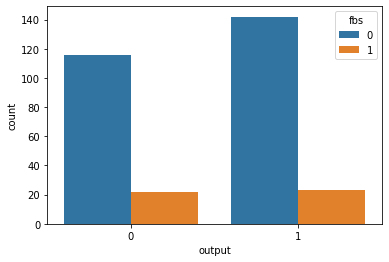

In [10]:
sns.countplot(x='output',data=heart_data, hue='fbs')

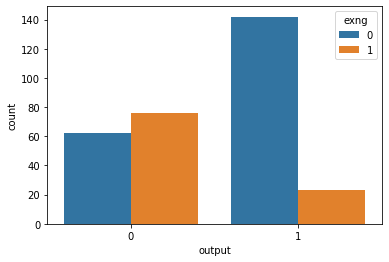

In [11]:
sns.countplot(x='output', data=heart_data, hue='exng')

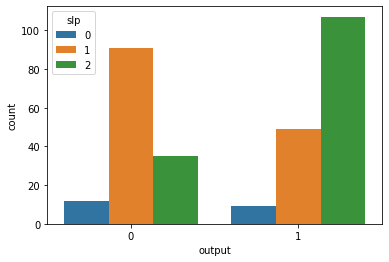

In [12]:
sns.countplot(x='output', data=heart_data, hue='slp')

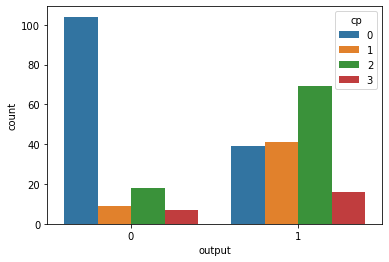

In [13]:
sns.countplot(x='output', data=heart_data, hue='cp')

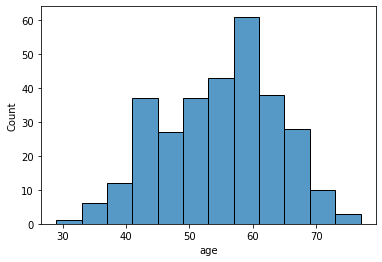

In [14]:
sns.histplot(x=heart_data['age'])

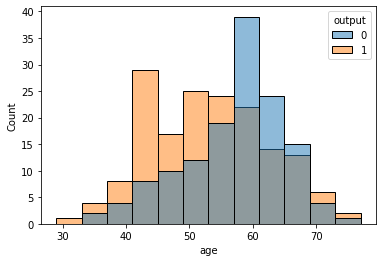

In [15]:
sns.histplot(x=heart_data['age'], hue=heart_data['output'])

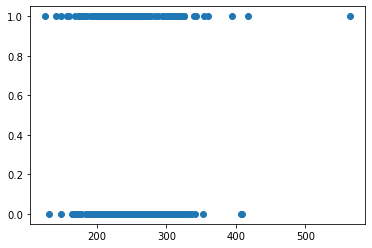

In [16]:
plt.scatter(x=heart_data['chol'], y=heart_data['output'])

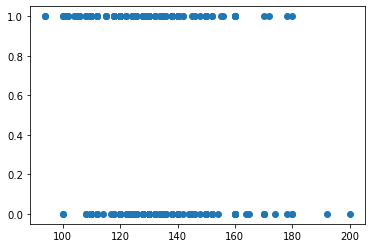

In [17]:
plt.scatter(x=heart_data['trtbps'], y=heart_data['output'])

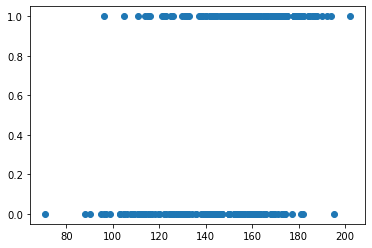

In [18]:
plt.scatter(x=heart_data['thalachh'], y=heart_data['output'])

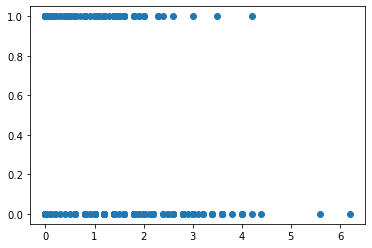

In [19]:
plt.scatter(x=heart_data['oldpeak'], y=heart_data['output'])

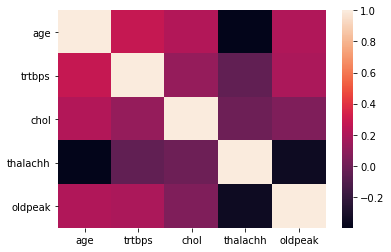

In [20]:
corr = heart_data[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']].corr()
sns.heatmap(corr)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(heart_data.drop('output',axis=1), heart_data['output'], test_size=0.30, random_state=101)

In [23]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
predictions = logreg.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.81      0.94      0.87        47

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.86        91
weighted avg       0.87      0.86      0.86        91



In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
predictions = knn.predict(X_test)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56        44
           1       0.60      0.68      0.64        47

    accuracy                           0.60        91
   macro avg       0.60      0.60      0.60        91
weighted avg       0.60      0.60      0.60        91



In [32]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

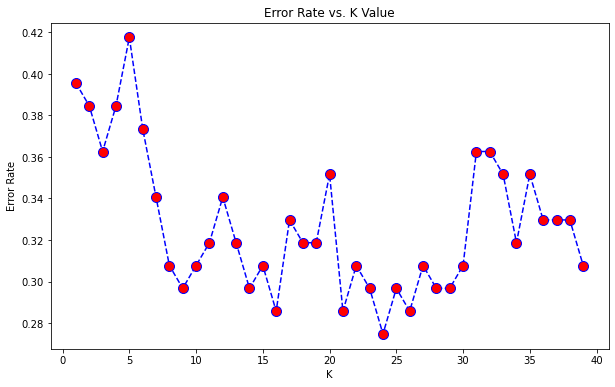

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
knn = KNeighborsClassifier(n_neighbors=24)

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [36]:
predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        44
           1       0.73      0.74      0.74        47

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91



In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit(heart_data.drop('output',axis=1))

StandardScaler()

In [40]:
scaled_features = scaler.transform(heart_data.drop('output',axis=1))

In [41]:
heart_scaled = pd.DataFrame(scaled_features,columns=heart_data.columns[:-1])
heart_scaled.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [42]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,heart_data['output'],test_size=0.30, random_state=101)

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
pred = knn.predict(X_test)

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        44
           1       0.76      0.83      0.80        47

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



In [47]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

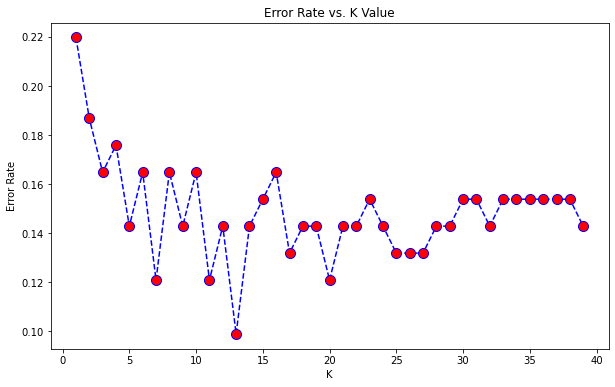

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [49]:
knn = KNeighborsClassifier(n_neighbors=13)

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [51]:
pred = knn.predict(X_test)

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        44
           1       0.87      0.96      0.91        47

    accuracy                           0.90        91
   macro avg       0.91      0.90      0.90        91
weighted avg       0.91      0.90      0.90        91



In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
rfc_pred = rfc.predict(X_test)

In [55]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.80      0.85      0.82        47

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [56]:
error_rate = []


for i in range(5,110):
    
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    


Text(0, 0.5, 'Error Rate')

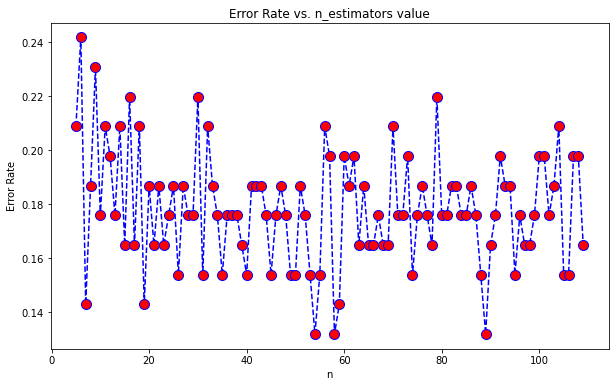

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(5,110),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators value')
plt.xlabel('n')
plt.ylabel('Error Rate')

In [58]:
best_n = error_rate.index(min(error_rate))+5
print(best_n)

54


In [59]:
rfc = RandomForestClassifier(n_estimators=best_n)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=54)

In [60]:
rfc_pred = rfc.predict(X_test)

In [61]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.82      0.87      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

